In [946]:
import pandas as pd
import matplotlib.pyplot as plt
import pprint

In [729]:
import os
os.chdir('/Users/lemuelrobinson/PycharmProjects/Turing_College/1_Sprint_2_Spotify')

### Project Overview ###

**Project Requirements**
- Download the data from Spotify Top 50 Tracks of 2020 dataset.
- Load the data using Pandas.
- Provide clear explanations in your notebook for analysis.
- Provide suggestions to improve analysis.


**Data cleaning objectives**
1. Handling missing values.
2. Removing duplicate samples and features.
3. Treating the outliers.


**Investigative questions:**
1. How many observations are there in this dataset?
2. How many features this dataset has?
3. Which of the features are categorical?
4. Which of the features are numeric?
5. Are there any artists that have more than 1 popular track? If yes, which and how many?
6. Who was the most popular artist?
7. How many artists in total have their songs in the top 50?
8. Are there any albums that have more than 1 popular track? If yes, which and how many?
9. How many albums in total have their songs in the top 50?
10. Which tracks have a danceability score above 0.7?
11. Which tracks have a danceability score below 0.4?
12. Which tracks have their loudness above -5?
13. Which tracks have their loudness below -8?
14. Which track is the longest?
15. Which track is the shortest?
16. Which genre is the most popular?
17. Which genres have just one song on the top 50?
18. How many genres in total are represented in the top 50?
19. Which features are strongly positively correlated?
20. Which features are strongly negatively correlated?
21. Which features are not correlated?
22. How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
23. How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
24. How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?



### Importing file and formatting dataframe ####

In [727]:
# import spotify csv file
spotify_df=pd.read_csv("spotifytoptracks.csv")

#cut the unnamed first column
spotify_df = spotify_df.iloc[:,1:]

### Data Cleaning ###

Before we do any analysis, we need to check if we have missing values, duplicates, or any quirks in formatting across the dataset that need to be resolved. In this section, we will check for the following: 

- Handling missing values.
- Removing duplicate samples and features.
- Treating the outliers.

In [757]:
# check if there are any null values in any column of the df
print(spotify_df.isnull().any())

#Removing duplicate samples and features
spotify_df.duplicated()
df = spotify_df.drop_duplicates(keep='first')
spotify_df.info()==df.info()

artist              False
album               False
track_name          False
track_id            False
energy              False
danceability        False
key                 False
loudness            False
acousticness        False
speechiness         False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
genre               False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64

True

In the previous cell, I used .duplicated() to check for duplicated rows across the columns in the dataset. From there I used .drop_duplicates() to copy the dataframe to a different variable df, comparing the .info() printout for each. 

Because they are both fifty rows long, have no NaN values, and are identical after removing possible duplicates, I feel confident saying that there are no duplicates in this dataset. We can now proceed with our analysis.

### Investigative questions ###

1. How many observations are there in this dataset?
2. How many features this dataset has?

In [59]:
observations,features = spotify_df.shape
print(f'There are {observations} observations in this dataframe')
print(f'There are {features} observations in this dataframe')

There are 50 observations in this dataframe
There are 16 observations in this dataframe


3. Which of the features are categorical?
4. Which of the features are numeric?

In [789]:
#Key is also a categorical variable according to the documentation, so I added it to categorical features
categorical_features=spotify_df.columns[spotify_df.dtypes=='object']
categorical_list=list(categorical_features)
categorical_list.append('key')

numeric_features=spotify_df.columns.drop(categorical_features)
numeric_features=numeric_features.drop(labels=['key'])
print(numeric_features)

Index(['energy', 'danceability', 'loudness', 'acousticness', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')


5. Are there any artists that have more than 1 popular track? If yes, which and how many?
6. Who was the most popular artist?

In [815]:
# Artists with more than one track

artists_with_multiple_tracks=spotify_df.artist.value_counts()[spotify_df.artist.value_counts() > 1]

print(f'Yes, there are {len(artists_with_multiple_tracks)} artists with multiple tracks on the Top 50.')

# This line pulls the names of the artists that we identified in the tally
multi_track_artists=artists_with_multiple_tracks.index


#I'm defining the most popular artist as the artist with the most Top 50 hits
#Taking max and indexing on that value since there are multiple winners

most_songs_on_charts = spotify_df.artist.value_counts().max()

top_artists = spotify_df.artist.value_counts()[spotify_df.artist.value_counts()==most_songs_on_charts]

Yes, there are 7 artists with multiple tracks on the Top 50.


7. How many artists in total have their songs in the top 50?
8. Are there any albums that have more than 1 popular track? If yes, which and how many?

In [816]:
#7
# We identify the unique artist list to answer this question
number_of_artists=len(spotify_df.artist.unique())
print(f'There are {number_of_artists} total in the top 50.')

#8
# I'm subsetting the main df and then filtering on albums that appear more than once
album_filter=spotify_df[['artist','album','track_name']]
album_filter.groupby(['artist','album'])
print(album_filter.head(10))

multi_charting_albums=album_filter.album.value_counts()[album_filter.album.value_counts()>1]
albums=multi_charting_albums.index
print(f'There are {len(albums)} albums with more than 1 track on the charts.')
#top_artists = spotify_df.artist.value_counts()[spotify_df.artist.value_counts()==most_songs_on_charts]


There are 40 total in the top 50.
          artist                                    album  \
0     The Weeknd                              After Hours   
1    Tones And I                             Dance Monkey   
2    Roddy Ricch    Please Excuse Me For Being Antisocial   
3      SAINt JHN                    Roses (Imanbek Remix)   
4       Dua Lipa                         Future Nostalgia   
5         DaBaby                         BLAME IT ON BABY   
6   Harry Styles                                Fine Line   
7          Powfu         death bed (coffee for your head)   
8  Trevor Daniel                                 Nicotine   
9  Lewis Capaldi  Divinely Uninspired To A Hellish Extent   

                         track_name  
0                   Blinding Lights  
1                      Dance Monkey  
2                           The Box  
3             Roses - Imanbek Remix  
4                   Don't Start Now  
5      ROCKSTAR (feat. Roddy Ricch)  
6                  Watermelo

 9. How many albums in total have their songs in the top 50?
 10. Which tracks have a danceability score above 0.7?

In [833]:
total_albums=len(spotify_df.album.unique())
print(f'There are {total_albums} albums in the top 50.\n')

#10 
danceable_music=spotify_df[['track_name','artist']][spotify_df.danceability>0.7]
danceable_songs=danceable_music.track_name
tally=len(danceable_songs)

print(f"There are {tally} songs in the Top 50 with a danceability score above 0.7\n\n")
danceable_music.head(tally)

There are 45 albums in the top 50.

There are 32 songs in the Top 50 with a danceability score above 0.7




,track_name,artist
1,Dance Monkey,Tones And I
2,The Box,Roddy Ricch
3,Roses - Imanbek Remix,SAINt JHN
4,Don't Start Now,Dua Lipa
5,ROCKSTAR (feat. Roddy Ricch),DaBaby
7,death bed (coffee for your head),Powfu
8,Falling,Trevor Daniel
10,Tusa,KAROL G
13,Blueberry Faygo,Lil Mosey
14,Intentions (feat. Quavo),Justin Bieber


11. Which tracks have a danceability score below 0.4?
12. Which tracks have their loudness above -5?

In [837]:
# Filter songs based on the threshold, then print artist and track name columns for readability
dance_filter = spotify_df[spotify_df.danceability<0.4]
print(dance_filter[['track_name','artist']])


#Filter based on loudness and then print the 
loudness_filter=spotify_df[spotify_df.loudness>-5]
track_list=loudness_filter[['track_name', 'artist']]
track_list.head(len(track_list))

              track_name         artist
44  lovely (with Khalid)  Billie Eilish


,track_name,artist
4,Don't Start Now,Dua Lipa
6,Watermelon Sugar,Harry Styles
10,Tusa,KAROL G
12,Circles,Post Malone
16,Before You Go,Lewis Capaldi
17,Say So,Doja Cat
21,Adore You,Harry Styles
23,Mood (feat. iann dior),24kGoldn
31,Break My Heart,Dua Lipa
32,Dynamite,BTS


13. Which tracks have their loudness below -8?
14. Which track is the longest?

In [842]:
#loudness below -8
# 
loudness_below=spotify_df[spotify_df.loudness<-8]
loudness_below.head()
track_list=loudness_below[['track_name', 'artist']]
print(track_list.head(len(track_list)))

# Longest track
longest_song_df=spotify_df[['artist','track_name','duration_ms']]
longest_song_df.sort_values(by='duration_ms',ascending=False)
longest_song_index=longest_song_df.duration_ms.index.max()
longest_song= spotify_df.iloc[[longest_song_index]]
artist=[*longest_song.artist.values][0]
song=[*longest_song.track_name.values][0]
print(f'\n{song} by {artist} is the longest track in the Top 50')

                                        track_name         artist
7                 death bed (coffee for your head)          Powfu
8                                          Falling  Trevor Daniel
15                                    Toosie Slide          Drake
20                Savage Love (Laxed - Siren Beat)      Jawsh 685
24                             everything i wanted  Billie Eilish
26                                         bad guy  Billie Eilish
36                             HIGHEST IN THE ROOM   Travis Scott
44                            lovely (with Khalid)  Billie Eilish
47  If the World Was Ending - feat. Julia Michaels        JP Saxe

SICKO MODE by Travis Scott is the longest track in the Top 50


15. Which track is the shortest?
16. Which genre is the most popular?

In [859]:
#shortest track
shortest_song_df=spotify_df[['artist','track_name','duration_ms']].copy()
shortest_song_df.sort_values('duration_ms',ascending=True, inplace=True)
shortest_song=shortest_song_df.iloc[0]
print(shortest_song)

#most popular genre, needs work
genres=spotify_df.genre.copy()
most_popular_genre=genres.value_counts()[genres.value_counts()==genres.value_counts().max()]
print('\n',most_popular_genre.index)


artist                       24kGoldn
track_name     Mood (feat. iann dior)
duration_ms                    140526
Name: 23, dtype: object

 Index(['Pop'], dtype='object', name='genre')


17. Which genres have just one song on the top 50?
18. How many genres in total are represented in the top 50?

In [884]:
#Which genres have just one song in the top 50? 
single_song_genres=genres.value_counts()[genres.value_counts()==1]
print(single_song_genres)

#Genres total in the top 50
total_genres=len(genres.unique())
print(f'\nThere are {total_genres} total genres in the Top 50.')

genre
Nu-disco                              1
R&B/Hip-Hop alternative               1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: count, dtype: int64

There are 16 total genres in the Top 50.


19. Which features are strongly positively correlated?
20. Which features are strongly negatively correlated?

In [887]:
#isolate float/int features in the dataset
numeric_df=spotify_df.drop(['artist','album','track_name','track_id','genre','key'],axis=1)
numeric_df.head()

#calculate correlation table
correlation_table=numeric_df.corr().style.background_gradient(cmap='coolwarm')
#pos_correlation_table[pos_correlation_table>0.7]
print(correlation_table)
#.style.background_gradient(cmap='coolwarm')
#correlation_table[:,(abs(correlation_table)>0.7).all()]
#df.loc[:, (df > 2).all()]

In [888]:
pos_correlation_table=numeric_df.corr()
pos_correlation_table[pos_correlation_table>0.7]

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.00000,NaN,0.79164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,0.79164,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


From this table we can see that the only strongly positively correlated features are energy and loudness. But this is not a strong conclusion given the small sample size, which only considers hit songs from popular genres. 

In [889]:
# Which features are strongly negatively correlated? 
neg_correlation_table=numeric_df.corr()
neg_correlation_table[pos_correlation_table<-0.7]

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In similar fashion, this table has NaN values only, showing that there are no strongly negatively correlated features in this dataset

In [901]:
# 21. Which features are not correlated?
no_correlation_table=numeric_df.corr()
no_correlation_table[abs(no_correlation_table)<0.3]

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,NaN,0.152552,NaN,NaN,0.074267,NaN,0.069487,NaN,0.075191,0.081971
danceability,0.152552,NaN,0.167147,NaN,0.226148,-0.017706,-0.006648,NaN,0.168956,-0.033763
loudness,NaN,0.167147,NaN,NaN,-0.021693,NaN,-0.069939,NaN,0.102097,0.064130
acousticness,NaN,NaN,NaN,NaN,-0.135392,NaN,-0.128384,-0.243192,-0.241119,-0.010988
speechiness,0.074267,0.226148,-0.021693,-0.135392,NaN,0.028948,-0.142957,0.053867,0.215504,NaN
instrumentalness,NaN,-0.017706,NaN,NaN,0.028948,NaN,-0.087034,-0.203283,0.018853,0.184709
liveness,0.069487,-0.006648,-0.069939,-0.128384,-0.142957,-0.087034,NaN,-0.033366,0.025457,-0.090188
valence,NaN,NaN,NaN,-0.243192,0.053867,-0.203283,-0.033366,NaN,0.045089,-0.039794
tempo,0.075191,0.168956,0.102097,-0.241119,0.215504,0.018853,0.025457,0.045089,NaN,0.130328
duration_ms,0.081971,-0.033763,0.064130,-0.010988,NaN,0.184709,-0.090188,-0.039794,0.130328,NaN


All of the variables shown in this table have really low pearson coefficients, but it is hard to say that these features are not correlated with such a small dataset

22. How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

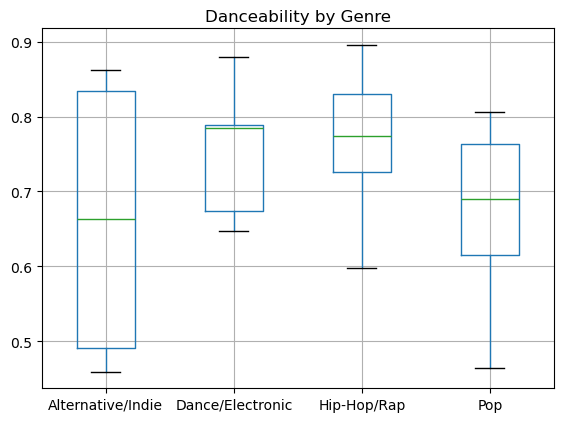

                  danceability                                             \
                         count      mean       std    min      25%    50%   
genre                                                                       
Alternative/Indie          4.0  0.661750  0.211107  0.459  0.49050  0.663   
Dance/Electronic           5.0  0.755000  0.094744  0.647  0.67400  0.785   
Hip-Hop/Rap               13.0  0.765538  0.085470  0.598  0.72600  0.774   
Pop                       14.0  0.677571  0.109853  0.464  0.61575  0.690   

                                   
                       75%    max  
genre                              
Alternative/Indie  0.83425  0.862  
Dance/Electronic   0.78900  0.880  
Hip-Hop/Rap        0.83000  0.896  
Pop                0.76275  0.806  


In [903]:
danceability_comparison=spotify_df[['genre','danceability']].copy()
danceability_comparison=danceability_comparison.loc[danceability_comparison['genre'].isin( 
['Pop','Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie'])]
danceability_comparison.groupby('genre')
danceability_comparison.set_index('genre')

boxplot=danceability_comparison.boxplot(column='danceability',by='genre')
plt.suptitle('Danceability by Genre', fontsize=12,y=0.94)
boxplot.set_title('')
boxplot.set(xlabel=None)  
plt.show()

print(danceability_comparison.groupby('genre').describe())

By far, Alternative/indie has the most variation in danceability, with a range of (0.459,0.862). Dance/Electronic arguably is the tightest genre on this feature given that median is on the upper range of the interquartile range. Hip-Hop is generally very danceable, and pop has a good amount of range too, just nowhere near as much as Alternative/Indie.

23. How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
24. How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

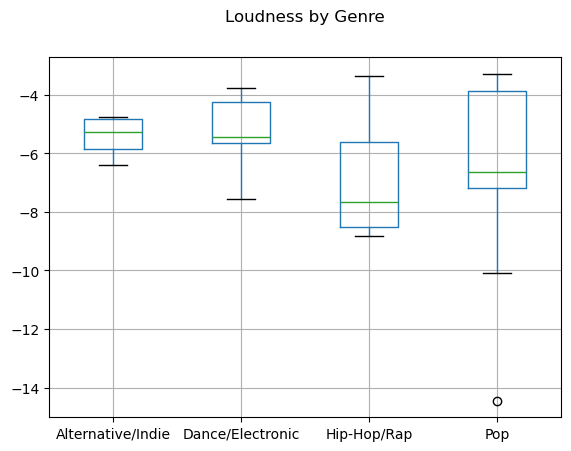

                  loudness                                               \
                     count      mean       std     min      25%     50%   
genre                                                                     
Alternative/Indie      4.0 -5.421000  0.774502  -6.401 -5.85950 -5.2685   
Dance/Electronic       5.0 -5.338000  1.479047  -7.567 -5.65200 -5.4570   
Hip-Hop/Rap           13.0 -6.917846  1.891808  -8.820 -8.52000 -7.6480   
Pop                   14.0 -6.460357  3.014281 -14.454 -7.17875 -6.6445   

                                   
                       75%    max  
genre                              
Alternative/Indie -4.83000 -4.746  
Dance/Electronic  -4.25800 -3.756  
Hip-Hop/Rap       -5.61600 -3.370  
Pop               -3.87525 -3.280  

Pop outlier:

artist        Ariana Grande
track_name        Adore You
loudness            -14.454
dtype: object


In [952]:
# How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres? 
loudness_comparison=spotify_df[['genre','loudness']].copy()
loudness_comparison=loudness_comparison.loc[loudness_comparison['genre'].isin( 
['Pop','Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie'])]
loudness_comparison.groupby('genre')
loudness_comparison.set_index('genre')

boxplot=loudness_comparison.boxplot(column='loudness',by='genre')
plt.suptitle('Loudness by Genre', fontsize=12,y=1.0)
boxplot.set_title('')
boxplot.set(xlabel=None)  
plt.show()
print(loudness_comparison.groupby('genre').describe())

#Loudness outlier 
print("\nPop outlier:\n")
print(spotify_df[['artist','track_name','loudness']][spotify_df.genre=='Pop'].min())

Loudness doesn't vary by genre all that much compared to our previous breakdown of danceability. Songs are generally "louder" in these genres, which might not really mean anything besides the songs being produced for radio markets that value high production value and really clean sound engineering levels. We do have an outlier for pop-loudness in Ariana Grande's "Adore You" which I captured below. 

I think a more detailed breakdown of the loudness metric is needed before we can read into this much further. 

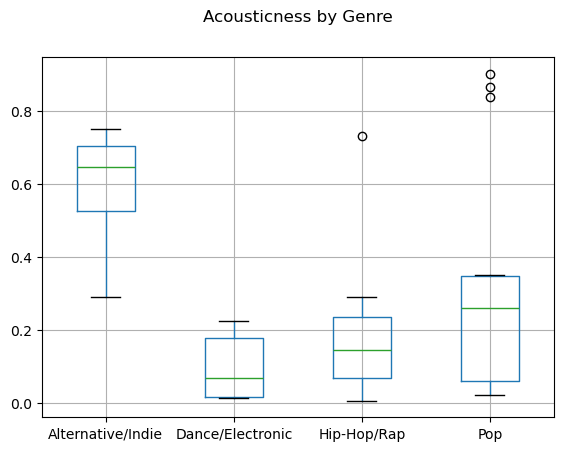

                  acousticness                                                \
                         count      mean       std      min      25%     50%   
genre                                                                          
Alternative/Indie          4.0  0.583500  0.204086  0.29100  0.52575  0.6460   
Dance/Electronic           5.0  0.099440  0.095828  0.01370  0.01490  0.0686   
Hip-Hop/Rap               13.0  0.188741  0.186396  0.00513  0.06700  0.1450   
Pop                       14.0  0.323843  0.318142  0.02100  0.05990  0.2590   

                                   
                       75%    max  
genre                              
Alternative/Indie  0.70375  0.751  
Dance/Electronic   0.17700  0.223  
Hip-Hop/Rap        0.23400  0.731  
Pop                0.34800  0.902  

Hip-Hop/Rap outlier:

artist          Travis Scott
track_name        goosebumps
acousticness           0.731
dtype: object

Pop outliers:

           artist                              

In [950]:
# How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
acousticness_comparison=spotify_df[['genre','acousticness']].copy()
acousticness_comparison=acousticness_comparison.loc[acousticness_comparison['genre'].isin( 
['Pop','Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie'])]
acousticness_comparison.groupby('genre')
acousticness_comparison.set_index('genre')

boxplot=acousticness_comparison.boxplot(column='acousticness',by='genre')
plt.suptitle('Acousticness by Genre', fontsize=12,y=1.0)
boxplot.set_title('')
boxplot.set(xlabel=None)  
plt.show()

print(acousticness_comparison.groupby('genre').describe())

#Outlier for Hip-Hop
print("\nHip-Hop/Rap outlier:\n")
print(spotify_df[['artist','track_name','acousticness']][spotify_df.genre=='Hip-Hop/Rap'].max())

#Outliers for Pop 
print("\nPop outliers:\n")
pop_outliers=spotify_df[['artist','track_name','acousticness']][spotify_df.genre=='Pop']
pop_outliers=pop_outliers[pop_outliers['acousticness']> 0.348]
print(pop_outliers)

Acousticness doesn't really vary by genre all that much, but we do have some outliers in the genres, denoted by the circles outside the interquartile range for Hip-Hop/Rap and Pop respectively. I included some code to identify which songs these datapoints correspond to, which can be found in the cell above. Interestingly, none of these songs are fully acoustic, but have some acoustic piano or other instrumentation. I'd be interested to see how loudness and acousticness change for each timestamp of these tracks to better understand how these values are assigned or defined under the hood when being added to the Spotify system.  

### Conclusion ### 

This is a nice dataset, relatively clean and easy to work with. I think that this analysis could be improved with more datapoints, additional documentation explaining how the Spotify system assigns the numeric features to each song. Additionally, I think that we would need to sample tracks outside of the Top 50 in a single year. Datapoints from more obscure genres, as well as charting songs from multiple markets around the world would strengthen our statistical significance, the insights we can glean, and our ability to trustworthiness of our analysis. 
